In [1]:
# import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import datetime as dt

In [2]:
raw = pd.read_excel('../datasets/anonymised_orders_original.xlsx')
# raw = pd.read_excel('Anonymised Orders.xlsx')

# pd.set_option('display.max_columns', None) # to show all columns

## Processing

In [3]:
raw_dropna = raw.dropna(axis=1)
raw_dropna

,Name,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Lineitem discount
0,#3200,2022-04-29 18:29:49 +0800,1,Arzuaga blanco,49.0,True,True,fulfilled,0.0
1,#3200,2022-04-29 18:29:49 +0800,1,Arzuaga reserva,94.0,True,True,fulfilled,0.0
2,#3070,2022-04-22 18:08:59 +0800,1,Eclisse,51.0,True,True,fulfilled,0.0
3,#3070,2022-04-22 18:08:59 +0800,2,Refosco,62.0,True,True,fulfilled,0.0
4,#3815,2022-05-29 19:37:45 +0800,1,Wine Ambassador Series: Portugal - 1700 - 1800,39.0,False,True,fulfilled,0.0
...,...,...,...,...,...,...,...,...,...
22971,#2303,2022-02-23 20:23:34 +0800,1,The Prisoner Saldo Zinfandel NV,82.0,True,True,fulfilled,0.0
22972,#2303,2022-02-23 20:23:34 +0800,1,Louis Tête Coteaux du Lyonnais Antique Bellum ...,34.0,True,True,fulfilled,0.0
22973,#2303,2022-02-23 20:23:34 +0800,1,Mastrojanni Rosso di Montalcino 2018,77.0,True,True,fulfilled,0.0
22974,#2303,2022-02-23 20:23:34 +0800,1,Tokumasamune Tokubetsu Junmai Yamahai - 720 ML,82.0,True,False,fulfilled,0.0


In [4]:
to_drop = ['Lineitem requires shipping', 'Lineitem taxable', 'Lineitem fulfillment status']

processed = raw_dropna.drop(columns=to_drop)
processed

,Name,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem discount
0,#3200,2022-04-29 18:29:49 +0800,1,Arzuaga blanco,49.0,0.0
1,#3200,2022-04-29 18:29:49 +0800,1,Arzuaga reserva,94.0,0.0
2,#3070,2022-04-22 18:08:59 +0800,1,Eclisse,51.0,0.0
3,#3070,2022-04-22 18:08:59 +0800,2,Refosco,62.0,0.0
4,#3815,2022-05-29 19:37:45 +0800,1,Wine Ambassador Series: Portugal - 1700 - 1800,39.0,0.0
...,...,...,...,...,...,...
22971,#2303,2022-02-23 20:23:34 +0800,1,The Prisoner Saldo Zinfandel NV,82.0,0.0
22972,#2303,2022-02-23 20:23:34 +0800,1,Louis Tête Coteaux du Lyonnais Antique Bellum ...,34.0,0.0
22973,#2303,2022-02-23 20:23:34 +0800,1,Mastrojanni Rosso di Montalcino 2018,77.0,0.0
22974,#2303,2022-02-23 20:23:34 +0800,1,Tokumasamune Tokubetsu Junmai Yamahai - 720 ML,82.0,0.0


In [5]:
# weird names
processed[processed['Name'].astype(str).str.len()>6]

# some names share the same number, with or without the '#'

,Name,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem discount
15886,7162-02-01 00:00:00,2023-05-11 14:06:47 +0800,1,"First Drop ""Mother's Milk"" Barossa Shiraz 2021",60.00,0.0
15887,7161-02-01 00:00:00,2023-05-10 20:48:32 +0800,1,Spier Canned Wine - Merlot,12.50,0.0
15888,7161-02-01 00:00:00,2023-05-10 20:48:32 +0800,1,Glassware,1.25,0.0
16387,#2-6585,2023-04-06 12:43:02 +0800,2,By the Glass - Coffee/Tea - Hot / Cappucino (O...,5.00,0.0
16431,#2-6547,2023-04-01 19:57:15 +0800,3,By the Glass,12.00,0.0
16432,#2-6547,2023-04-01 19:57:15 +0800,1,Bock Ermitage Cuvee 2018,59.00,11.8
16444,#2-6530,2023-04-01 17:11:36 +0800,1,By the Glass - Beer - R2D2 Lager,7.00,0.0
16445,#2-6530,2023-04-01 17:11:36 +0800,1,By the Glass - Beer - Brekkie Stout,9.00,0.0
16446,#2-6530,2023-04-01 17:11:36 +0800,1,By the Glass - Coffee/Tea - Hot / Long Black,3.50,0.0
17070,#2-5974,2023-03-01 19:22:54 +0800,1,Chizay Pinot Noir 2018,57.00,0.0


In [6]:
# Handling the weird names
processed[processed['Name'].astype(str).str.contains('.', '', regex=False)]
processed['Name'] = processed['Name'].astype(str).str.replace('.', '', regex=False)

In [7]:
# double check with Kevan's dataset
processed[processed['Name'].astype(str).str.len() > 6]

,Name,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem discount
15886,7162-02-01 00:00:00,2023-05-11 14:06:47 +0800,1,"First Drop ""Mother's Milk"" Barossa Shiraz 2021",60.00,0.0
15887,7161-02-01 00:00:00,2023-05-10 20:48:32 +0800,1,Spier Canned Wine - Merlot,12.50,0.0
15888,7161-02-01 00:00:00,2023-05-10 20:48:32 +0800,1,Glassware,1.25,0.0
16387,#2-6585,2023-04-06 12:43:02 +0800,2,By the Glass - Coffee/Tea - Hot / Cappucino (O...,5.00,0.0
16431,#2-6547,2023-04-01 19:57:15 +0800,3,By the Glass,12.00,0.0
16432,#2-6547,2023-04-01 19:57:15 +0800,1,Bock Ermitage Cuvee 2018,59.00,11.8
16444,#2-6530,2023-04-01 17:11:36 +0800,1,By the Glass - Beer - R2D2 Lager,7.00,0.0
16445,#2-6530,2023-04-01 17:11:36 +0800,1,By the Glass - Beer - Brekkie Stout,9.00,0.0
16446,#2-6530,2023-04-01 17:11:36 +0800,1,By the Glass - Coffee/Tea - Hot / Long Black,3.50,0.0
17070,#2-5974,2023-03-01 19:22:54 +0800,1,Chizay Pinot Noir 2018,57.00,0.0


In [8]:
# Handling weird names
names = processed[processed['Name'].astype(str).str.len() > 6]
names2 = names['Name'].unique()
name_mapping = {name: idx + 10000000 for idx, name in enumerate(names2)}
processed.loc[names.index, 'Name'] = processed.loc[names.index, 'Name'].map(name_mapping)

# Merge the numbers with '#' from 'Name' column
processed['Name'] = processed['Name'].astype(str).str.replace('#', '')

# Get unique 'Name' values and assign unique IDs
name_to_id = {}
current_id = 0
for name in processed['Name'].unique():
    name_to_id[name] = current_id
    current_id += 1

# Replace 'Name' values with corresponding IDs
processed['Name'] = processed['Name'].map(name_to_id)

# Rename 'Name' column to 'customer_id'
processed = processed.rename(columns={'Name': 'customer_id'})

processed_1 = processed.copy()

In [9]:
to_process = processed_1.copy()

In [10]:
column_mapping = {
    'Created at': 'order_time',
    'Lineitem quantity': 'item_quantity',
    'Lineitem name': 'item_id',
    'Lineitem price': 'item_price',
    'Lineitem discount': 'item_discount_raw'
}

to_process.rename(columns=column_mapping, inplace=True)

In [11]:
def process_disc(item_discount_raw, item_price, item_quantity):
    
    # logic to handle if discount > item price
    if float(item_discount_raw) <= float(item_price) * float(item_quantity):
        total_amt = float(item_price) * float(item_quantity)
        
        if total_amt == 0:
            return np.nan
        
        disc_percentage = (float(item_discount_raw) / total_amt) / float(item_quantity)
        
        return disc_percentage *100
    return np.nan

to_process['item_discount_percentage'] = to_process.apply(lambda x: process_disc(x['item_discount_raw'], x['item_price'], x['item_quantity']), axis=1)


#to_process['item_discount_percentage'] = (to_process['item_discount_raw'] / to_process['item_price']*to_process['item_quantity']) / to_process['item_quantity']

# handle cases where item_price == 0 as they would be NaN
to_process['item_discount_percentage'].fillna(0, inplace=True)

In [12]:
sample = to_process[['customer_id', 'item_discount_percentage']]
sample['item_discount_percentage'].value_counts().sort_values()

# for original binning

sample['item_disc_bins'] = pd.cut(x=sample['item_discount_percentage'], bins=[-1,0,20,40,60,80,100], labels=['item_disc_null', 'item_disc_sub_twenty', 'item_disc_sub_forty', 'item_disc_sub_sixty', 'item_disc_sub_eighty', 'item_disc_sub_hundred'])
sample['item_disc_bins'].value_counts()

C:\Users\Kevan\AppData\Local\Temp/ipykernel_10276/928966872.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['item_disc_bins'] = pd.cut(x=sample['item_discount_percentage'], bins=[-1,0,20,40,60,80,100], labels=['item_disc_null', 'item_disc_sub_twenty', 'item_disc_sub_forty', 'item_disc_sub_sixty', 'item_disc_sub_eighty', 'item_disc_sub_hundred'])


item_disc_null           21999
item_disc_sub_twenty       728
item_disc_sub_hundred      200
item_disc_sub_forty         34
item_disc_sub_eighty         9
item_disc_sub_sixty          6
Name: item_disc_bins, dtype: int64

In [13]:
# maybe can explore another way of binning here
sample2 = to_process[['customer_id', 'item_discount_percentage']]

In [14]:
# binning
to_process['item_disc_bins'] = pd.cut(x=to_process['item_discount_percentage'], bins=[-1,0,20,40,60,80,100], labels=['item_disc_null', 'item_disc_sub_twenty', 'item_disc_sub_forty', 'item_disc_sub_sixty', 'item_disc_sub_eighty', 'item_disc_sub_hundred'])

to_process.head()

,customer_id,order_time,item_quantity,item_id,item_price,item_discount_raw,item_discount_percentage,item_disc_bins
0,0,2022-04-29 18:29:49 +0800,1,Arzuaga blanco,49.0,0.0,0.0,item_disc_null
1,0,2022-04-29 18:29:49 +0800,1,Arzuaga reserva,94.0,0.0,0.0,item_disc_null
2,1,2022-04-22 18:08:59 +0800,1,Eclisse,51.0,0.0,0.0,item_disc_null
3,1,2022-04-22 18:08:59 +0800,2,Refosco,62.0,0.0,0.0,item_disc_null
4,2,2022-05-29 19:37:45 +0800,1,Wine Ambassador Series: Portugal - 1700 - 1800,39.0,0.0,0.0,item_disc_null


In [15]:
# one-hot-encoding of item discount percentage
processed = pd.get_dummies(to_process, columns=['item_disc_bins'])

In [16]:
processed

,customer_id,order_time,item_quantity,item_id,item_price,item_discount_raw,item_discount_percentage,item_disc_bins_item_disc_null,item_disc_bins_item_disc_sub_twenty,item_disc_bins_item_disc_sub_forty,item_disc_bins_item_disc_sub_sixty,item_disc_bins_item_disc_sub_eighty,item_disc_bins_item_disc_sub_hundred
0,0,2022-04-29 18:29:49 +0800,1,Arzuaga blanco,49.0,0.0,0.0,1,0,0,0,0,0
1,0,2022-04-29 18:29:49 +0800,1,Arzuaga reserva,94.0,0.0,0.0,1,0,0,0,0,0
2,1,2022-04-22 18:08:59 +0800,1,Eclisse,51.0,0.0,0.0,1,0,0,0,0,0
3,1,2022-04-22 18:08:59 +0800,2,Refosco,62.0,0.0,0.0,1,0,0,0,0,0
4,2,2022-05-29 19:37:45 +0800,1,Wine Ambassador Series: Portugal - 1700 - 1800,39.0,0.0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22971,10921,2022-02-23 20:23:34 +0800,1,The Prisoner Saldo Zinfandel NV,82.0,0.0,0.0,1,0,0,0,0,0
22972,10921,2022-02-23 20:23:34 +0800,1,Louis Tête Coteaux du Lyonnais Antique Bellum ...,34.0,0.0,0.0,1,0,0,0,0,0
22973,10921,2022-02-23 20:23:34 +0800,1,Mastrojanni Rosso di Montalcino 2018,77.0,0.0,0.0,1,0,0,0,0,0
22974,10921,2022-02-23 20:23:34 +0800,1,Tokumasamune Tokubetsu Junmai Yamahai - 720 ML,82.0,0.0,0.0,1,0,0,0,0,0


In [18]:
# separate date and time
processed['order_date'] = pd.to_datetime(processed['order_time']).dt.date
processed['order_time'] = pd.to_datetime(processed['order_time']).dt.time

In [19]:
processed

,customer_id,order_time,item_quantity,item_id,item_price,item_discount_raw,item_discount_percentage,item_disc_bins_item_disc_null,item_disc_bins_item_disc_sub_twenty,item_disc_bins_item_disc_sub_forty,item_disc_bins_item_disc_sub_sixty,item_disc_bins_item_disc_sub_eighty,item_disc_bins_item_disc_sub_hundred,order_date
0,0,18:29:49,1,Arzuaga blanco,49.0,0.0,0.0,1,0,0,0,0,0,2022-04-29
1,0,18:29:49,1,Arzuaga reserva,94.0,0.0,0.0,1,0,0,0,0,0,2022-04-29
2,1,18:08:59,1,Eclisse,51.0,0.0,0.0,1,0,0,0,0,0,2022-04-22
3,1,18:08:59,2,Refosco,62.0,0.0,0.0,1,0,0,0,0,0,2022-04-22
4,2,19:37:45,1,Wine Ambassador Series: Portugal - 1700 - 1800,39.0,0.0,0.0,1,0,0,0,0,0,2022-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22971,10921,20:23:34,1,The Prisoner Saldo Zinfandel NV,82.0,0.0,0.0,1,0,0,0,0,0,2022-02-23
22972,10921,20:23:34,1,Louis Tête Coteaux du Lyonnais Antique Bellum ...,34.0,0.0,0.0,1,0,0,0,0,0,2022-02-23
22973,10921,20:23:34,1,Mastrojanni Rosso di Montalcino 2018,77.0,0.0,0.0,1,0,0,0,0,0,2022-02-23
22974,10921,20:23:34,1,Tokumasamune Tokubetsu Junmai Yamahai - 720 ML,82.0,0.0,0.0,1,0,0,0,0,0,2022-02-23


In [21]:
# final rearranging the columns
cols = processed.columns.tolist()
cols

['customer_id',
 'order_time',
 'item_quantity',
 'item_id',
 'item_price',
 'item_discount_raw',
 'item_discount_percentage',
 'item_disc_bins_item_disc_null',
 'item_disc_bins_item_disc_sub_twenty',
 'item_disc_bins_item_disc_sub_forty',
 'item_disc_bins_item_disc_sub_sixty',
 'item_disc_bins_item_disc_sub_eighty',
 'item_disc_bins_item_disc_sub_hundred',
 'order_date']

In [22]:
final = processed[
    ['customer_id',
     'order_date',
     'order_time',
     'item_id',
     'item_quantity',
     'item_price',
     'item_discount_raw',
     'item_discount_percentage',
     'item_disc_bins_item_disc_null',
     'item_disc_bins_item_disc_sub_twenty',
     'item_disc_bins_item_disc_sub_forty',
     'item_disc_bins_item_disc_sub_sixty',
     'item_disc_bins_item_disc_sub_eighty',
     'item_disc_bins_item_disc_sub_hundred']
]

In [23]:
final

,customer_id,order_date,order_time,item_id,item_quantity,item_price,item_discount_raw,item_discount_percentage,item_disc_bins_item_disc_null,item_disc_bins_item_disc_sub_twenty,item_disc_bins_item_disc_sub_forty,item_disc_bins_item_disc_sub_sixty,item_disc_bins_item_disc_sub_eighty,item_disc_bins_item_disc_sub_hundred
0,0,2022-04-29,18:29:49,Arzuaga blanco,1,49.0,0.0,0.0,1,0,0,0,0,0
1,0,2022-04-29,18:29:49,Arzuaga reserva,1,94.0,0.0,0.0,1,0,0,0,0,0
2,1,2022-04-22,18:08:59,Eclisse,1,51.0,0.0,0.0,1,0,0,0,0,0
3,1,2022-04-22,18:08:59,Refosco,2,62.0,0.0,0.0,1,0,0,0,0,0
4,2,2022-05-29,19:37:45,Wine Ambassador Series: Portugal - 1700 - 1800,1,39.0,0.0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22971,10921,2022-02-23,20:23:34,The Prisoner Saldo Zinfandel NV,1,82.0,0.0,0.0,1,0,0,0,0,0
22972,10921,2022-02-23,20:23:34,Louis Tête Coteaux du Lyonnais Antique Bellum ...,1,34.0,0.0,0.0,1,0,0,0,0,0
22973,10921,2022-02-23,20:23:34,Mastrojanni Rosso di Montalcino 2018,1,77.0,0.0,0.0,1,0,0,0,0,0
22974,10921,2022-02-23,20:23:34,Tokumasamune Tokubetsu Junmai Yamahai - 720 ML,1,82.0,0.0,0.0,1,0,0,0,0,0


In [24]:
final.to_csv("../datasets/cleaned_orders.csv", index=False)

## Prev EDA Dump

In [3]:
raw = pd.read_excel('Anonymised Orders.xlsx')
print(raw.shape)
print(raw.columns)
raw.head(5)

(22976, 81)
Index(['Name', 'Email', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Fulfilled at', 'Accepts Marketing', 'Currency', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Code', 'Discount Amount', 'Shipping Method',
       'Created at', 'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Billing Name', 'Billing Street',
       'Billing Address1', 'Billing Address2', 'Billing Company',
       'Billing City', 'Billing Zip', 'Billing Province', 'Billing Country',
       'Billing Phone', 'Shipping Name', 'Shipping Street',
       'Shipping Address1', 'Shipping Address2', 'Shipping Company',
       'Shipping City', 'Shipping Zip', 'Shipping Province',
       'Shipping Country', 'Shipping Phone', 'Notes', 'Note Attributes',
       'Cancelled at', 'Payment Method', 'Payment Reference',
       'Refunded Amount',

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment ID,Payment Terms Name,Next Payment Due At,Payment References,Unnamed: 79,Unnamed: 80
0,#3200,893696139@yopmail.com,paid,2022-04-29 18:29:50 +0800,fulfilled,2022-06-17 13:40:16 +0800,yes,SGD,143.0,0.0,...,2-1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#3200,893696139@yopmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#3070,893696139@yopmail.com,paid,2022-04-22 18:09:00 +0800,fulfilled,2022-04-22 18:08:59 +0800,no,SGD,175.0,0.0,...,2-1429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#3070,893696139@yopmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#3815,NaN,paid,2022-05-29 19:37:46 +0800,fulfilled,2022-05-29 19:45:49 +0800,yes,SGD,39.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
raw['Financial Status'].value_counts()
raw['Risk Level'].value_counts()
# raw.isnull().sum() # total number of rows = 22976

Name                       0
Email                   8107
Financial Status       12034
Paid at                12145
Fulfillment Status     12034
                       ...  
Payment Terms Name     22901
Next Payment Due At    22976
Payment References     22976
Unnamed: 79            22976
Unnamed: 80            22976
Length: 81, dtype: int64


In [15]:
order = raw[['Name', 'Email', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Fulfilled at', 'Accepts Marketing', 'Currency', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Code', 'Discount Amount', 'Shipping Method',
       'Created at', 'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Payment Method', 'Payment Reference',
       'Refunded Amount', 'Vendor', 'Outstanding Balance', 'Employee',
       'Location', 'Device ID', 'Id', 'Tags', 'Risk Level', 'Source',
       'Lineitem discount', 'Receipt Number', 'Billing Province Name',
       'Payment Terms Name']]

In [16]:
order.isnull().sum() # total number of rows = 22976

Name                               0
Email                           8107
Financial Status               12034
Paid at                        12145
Fulfillment Status             12034
Fulfilled at                   12175
Accepts Marketing              12034
Currency                       12034
Subtotal                       12034
Shipping                       12034
Taxes                          12034
Total                          12034
Discount Code                  21562
Discount Amount                12034
Shipping Method                20718
Created at                         0
Lineitem quantity                  0
Lineitem name                      0
Lineitem price                     0
Lineitem compare at price      21913
Lineitem sku                   15362
Lineitem requires shipping         0
Lineitem taxable                   0
Lineitem fulfillment status        0
Payment Method                 14144
Payment Reference              12145
Refunded Amount                12034
V

In [20]:
order['Lineitem name'].value_counts()

Glassware                          728
Wine Virgin                        325
Rara Neagră de Purcari 2020        110
Wine Nut                            86
Puchang Beichun 2015                81
                                  ... 
GT Spain                             1
Blink Wines                          1
Freehand Ormus Field Blend 2020      1
Fumo olive oil                       1
Muga Gift Set                        1
Name: Lineitem name, Length: 4481, dtype: int64

In [26]:
no_fin_status = order[order['Financial Status'].isnull()==False]
no_fin_status.isnull().sum()
# no_fin_status.head()

no_fin_status['Lineitem name'].value_counts()

Wine Virgin                                                             325
Wine Nut                                                                 86
Wine Subscription - Virgin (One Bottle Every 2 Weeks) / Once a Month     80
Beer                                                                     48
Puchang Beichun 2015                                                     46
                                                                       ... 
L.A.S Vino Cabernet Sauvignon 2018                                        1
Chateau Magdeleine Bouhou La Petite Malbec 2019 - Single Bottle           1
Vinaera PRO-MV7                                                           1
LAS FUCC HIM                                                              1
Muga Gift Set                                                             1
Name: Lineitem name, Length: 3090, dtype: int64

array([<AxesSubplot:xlabel='Created at'>,
       <AxesSubplot:xlabel='Created at'>,
       <AxesSubplot:xlabel='Created at'>, ...,
       <AxesSubplot:xlabel='Created at'>,
       <AxesSubplot:xlabel='Created at'>,
       <AxesSubplot:xlabel='Created at'>], dtype=object)

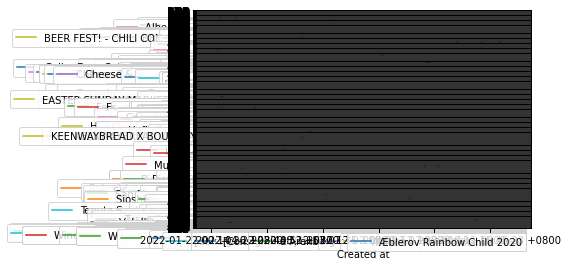

In [27]:
pd.pivot_table(order.reset_index(), index='Created at', columns='Lineitem name', values='Lineitem quantity').plot(subplots=True)